<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/title.png' width=500/></center>

<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/practice3.png' width=300/></center>

# 소매점 판매 현황

<img src='https://raw.githubusercontent.com/Jangrae/img/master/retail.png' width="650" align="left">

## 1.환경 설정

- 데이터 탐색과 전처리를 하기 전 라이브러리와 파일을 읽어옵니다.
- 시각화에 한글이 포함된 경우 이에 대한 설정을 진행합니다.

**1) 한글 설정**

- Jupyter Notebook 시각화에 한글이 표시되게 설정합니다.

In [533]:
# 라이브러리 불러오기
import matplotlib 
import matplotlib.pyplot as plt

# 폰트설정
matplotlib.font_manager._rebuild()
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

**2) 라이브러리 불러오기**

- 사용할 라이브러리를 불러옵니다.

In [534]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'

**3) 데이터 읽어오기**

- 다음 경로의 파일을 읽어와 customers, products, orders 데이터프레임을 만듭니다.
- 파일 경로1: 'https://raw.githubusercontent.com/Jangrae/csv/master/customers.csv'    
- 파일 경로2: 'https://raw.githubusercontent.com/Jangrae/csv/master/products.csv'
- 파일 경로3: 'https://raw.githubusercontent.com/Jangrae/csv/master/orders.csv'
- 단축 경로1: 'https://bit.ly/CustomersFile'    
- 단축 경로2: 'https://bit.ly/ProductsFile'  
- 단축 경로3: 'https://bit.ly/OrdersFile'  

In [535]:
#customers 데이터 불러오기
path = 'https://bit.ly/CustomersFile'
customers = pd.read_csv(path)

#2017년 데이터 2017-birth year = 나이
#확인
customers.head()

,CustomerID,RegisterDate,Address,Gender,BirthYear,Addr1,Addr2
0,c017487,2002-07-31,경기 성남시 중원구 둔촌대로190번길,F,1968,경기도,성남시
1,c017503,2002-07-31,서울 마포구 새터산12길,F,1971,서울특별시,마포구
2,c017517,2002-07-31,경기도 남양주시 와부읍 덕소로,M,1967,경기도,남양주시
3,c017522,2002-07-31,강원도 원주시 단구로,F,1965,강원도,원주시
4,c017526,2002-07-31,경기도 부천시 오정구 소사로730번길,F,1960,경기도,부천시


In [536]:
#products 데이터 불러오기
path = 'https://bit.ly/ProductsFile'
products = pd.read_csv(path)

#확인
products.head()
#categoryord 열 날리기 필요없음

,ProductID,ProductName,Category,SubCategory,CategoryOrd
0,p1001771,마늘,채소,뿌리채소,5
1,p1002841,딸기_대,과일,과채,2
2,p1005621,숙주나물,반찬류,나물류,1
3,p1005771,두부_소,반찬류,두부,1
4,p1005891,두부_대,반찬류,두부,1


In [537]:
#orders 데이터 불러오기
path = 'https://bit.ly/OrdersFile'
orders = pd.read_csv(path)

#확인
orders.head(10)

,OrderID,Seq,OrderDate,ProductID,Qty,Amt,CustomerID
0,1,1,2016-01-02,p1030071,2,7900,c107853
1,2,1,2016-01-02,p1012761,1,1700,c110521
2,2,2,2016-01-02,p1012581,1,1000,c110521
3,2,3,2016-01-02,p1175481,1,1300,c110521
4,2,4,2016-01-02,p1178011,1,8800,c110521
5,3,1,2016-01-02,p1012751,2,2700,c143548
6,4,1,2016-01-02,p1097821,1,1000,c256672
7,4,2,2016-01-02,p1178011,1,8800,c256672
8,5,1,2016-01-02,p1178011,1,8800,c260294
9,5,2,2016-01-02,p1194801,1,8200,c260294


## 2.데이터 탐색

다음과 같은 정보 확인을 통해 처리할 대상 데이터를 이해합니다.
- 상/하위 데이터 확인
- 데이터프레임 크기 확인
- 열 이름, 데이터 형식, 값 개수 등 확인
- 기초 통계정보 확인
- 결측치 확인
- 범주형 데이터 확인
- 개별 열 값 상세 확인 등

**1) 고객 정보(customers)  4가지 이상 탐색**

- customers 데이터프레임을 충분히 탐색합니다.
- 간단한 집계를 수행해 보는 것도 좋은 방법입니다.

In [538]:
# 열 정보 확인
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2243 entries, 0 to 2242
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    2243 non-null   object
 1   RegisterDate  2243 non-null   object
 2   Address       2243 non-null   object
 3   Gender        2243 non-null   object
 4   BirthYear     2243 non-null   int64 
 5   Addr1         2243 non-null   object
 6   Addr2         2243 non-null   object
dtypes: int64(1), object(6)
memory usage: 122.8+ KB


In [539]:
# 결측치 확인 => 결측치 없음
customers.isna().sum()

CustomerID      0
RegisterDate    0
Address         0
Gender          0
BirthYear       0
Addr1           0
Addr2           0
dtype: int64

In [540]:
# 기초통계정보 
customers.describe()

,BirthYear
count,2243.000000
mean,1971.107445
std,9.658465
min,1932.000000
25%,1966.000000
50%,1972.000000
75%,1978.000000
max,1999.000000


In [541]:
# 상위 5개 행 확인
customers.head()
#Add1

,CustomerID,RegisterDate,Address,Gender,BirthYear,Addr1,Addr2
0,c017487,2002-07-31,경기 성남시 중원구 둔촌대로190번길,F,1968,경기도,성남시
1,c017503,2002-07-31,서울 마포구 새터산12길,F,1971,서울특별시,마포구
2,c017517,2002-07-31,경기도 남양주시 와부읍 덕소로,M,1967,경기도,남양주시
3,c017522,2002-07-31,강원도 원주시 단구로,F,1965,강원도,원주시
4,c017526,2002-07-31,경기도 부천시 오정구 소사로730번길,F,1960,경기도,부천시


In [542]:
# 데이터 크기 확인
customers.shape

(2243, 7)

**2) 상품 정보(products)**

- products 데이터프레임을 충분히 탐색합니다.
- 간단한 집계를 수행해 보는 것도 좋은 방법입니다.

In [543]:
# 열 정보 확인
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ProductID    62 non-null     object
 1   ProductName  62 non-null     object
 2   Category     62 non-null     object
 3   SubCategory  62 non-null     object
 4   CategoryOrd  62 non-null     int64 
dtypes: int64(1), object(4)
memory usage: 2.5+ KB


In [544]:
# 결측치 확인 => 결측치 없음
products.isna().sum()

ProductID      0
ProductName    0
Category       0
SubCategory    0
CategoryOrd    0
dtype: int64

In [545]:
# 데이터 크기 확인
products.shape

(62, 5)

In [546]:
# 기초통계정보 
products.describe()

,CategoryOrd
count,62.000000
mean,3.612903
std,1.406715
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


In [547]:
# 상위 5개 행 확인
products.head()

,ProductID,ProductName,Category,SubCategory,CategoryOrd
0,p1001771,마늘,채소,뿌리채소,5
1,p1002841,딸기_대,과일,과채,2
2,p1005621,숙주나물,반찬류,나물류,1
3,p1005771,두부_소,반찬류,두부,1
4,p1005891,두부_대,반찬류,두부,1


**3) 주문 정보(orders)**

- orders 데이터프레임을 충분히 탐색합니다.
- 간단한 집계를 수행해 보는 것도 좋은 방법입니다.

In [548]:
# 열 정보 확인
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68839 entries, 0 to 68838
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   OrderID     68839 non-null  int64 
 1   Seq         68839 non-null  int64 
 2   OrderDate   68839 non-null  object
 3   ProductID   68839 non-null  object
 4   Qty         68839 non-null  int64 
 5   Amt         68839 non-null  int64 
 6   CustomerID  68839 non-null  object
dtypes: int64(4), object(3)
memory usage: 3.7+ MB


In [549]:
# 결측치 확인 => 결측치 없음
orders.isna().sum()

OrderID       0
Seq           0
OrderDate     0
ProductID     0
Qty           0
Amt           0
CustomerID    0
dtype: int64

In [550]:
# 데이터 크기 확인
orders.shape

(68839, 7)

In [551]:
# 기초통계정보 
orders.describe()

,OrderID,Seq,Qty,Amt
count,68839.000000,68839.000000,68839.000000,68839.000000
mean,38.551519,2.082628,1.266985,2847.057990
std,23.952370,1.469644,1.372289,2634.378327
min,1.000000,1.000000,1.000000,250.000000
25%,18.000000,1.000000,1.000000,1300.000000
50%,37.000000,2.000000,1.000000,1950.000000
75%,56.000000,3.000000,1.000000,3227.000000
max,122.000000,15.000000,200.000000,109100.000000


In [552]:
# 상위 5개 행 확인
orders.head()

,OrderID,Seq,OrderDate,ProductID,Qty,Amt,CustomerID
0,1,1,2016-01-02,p1030071,2,7900,c107853
1,2,1,2016-01-02,p1012761,1,1700,c110521
2,2,2,2016-01-02,p1012581,1,1000,c110521
3,2,3,2016-01-02,p1175481,1,1300,c110521
4,2,4,2016-01-02,p1178011,1,8800,c110521


## 3.데이터 전처리

전처리 과정에서 다음과 같은 처리를 할 수 있습니다.

- 결측치 처리
- 값 변경
- 열 추가
- 불필요한 열 제거
- 열 이름 변경
- 데이터 통합(연결 또는 조인)
- 가변수화 등

**1) 데이터 통합 **  
(데이터프레임 명 : sales)
- 각 데이터프레임의 모든 열을 통합 할 것이 아니면 
    - 필요한 열만 추출해 별도 데이터프레임을 선언한 후 통합하거나
    - 또는 모두 통합 후 불필요한 열을 제거하는 방법을 사용합니다.
    
- 통합 방안
    - customers, orders 데이터프레임을 CustomerID를 기준으로 통합 
    - 앞서 통합한 데이터프레임과 products 데이터프레임과 ProductsID를 기준으로 통합
    - 불필요한 열 제거

In [553]:
# customers, orders 데이터프레임을 CustomerID를 기준으로 통합 
pop = pd.merge(customers,orders, on='CustomerID', how = 'inner')

# products 데이터프레임과 ProductsID를 기준으로 통합
sales = pd.merge(products, pop, on='ProductID', how='inner')

**2) 결과 확인**

In [554]:
#확인
sales.head()


,ProductID,ProductName,Category,SubCategory,CategoryOrd,CustomerID,RegisterDate,Address,Gender,BirthYear,Addr1,Addr2,OrderID,Seq,OrderDate,Qty,Amt
0,p1001771,마늘,채소,뿌리채소,5,c017487,2002-07-31,경기 성남시 중원구 둔촌대로190번길,F,1968,경기도,성남시,48,1,2016-03-19,1,3300
1,p1001771,마늘,채소,뿌리채소,5,c017487,2002-07-31,경기 성남시 중원구 둔촌대로190번길,F,1968,경기도,성남시,26,1,2016-04-15,1,3300
2,p1001771,마늘,채소,뿌리채소,5,c017487,2002-07-31,경기 성남시 중원구 둔촌대로190번길,F,1968,경기도,성남시,1,1,2016-09-01,1,3100
3,p1001771,마늘,채소,뿌리채소,5,c017487,2002-07-31,경기 성남시 중원구 둔촌대로190번길,F,1968,경기도,성남시,21,1,2016-12-11,1,3100
4,p1001771,마늘,채소,뿌리채소,5,c017487,2002-07-31,경기 성남시 중원구 둔촌대로190번길,F,1968,경기도,성남시,56,3,2016-12-30,1,3100


**3) 열 추가**

- 분석을 위해 필요한 열을 추가합니다.
- 예를 들어 다음과 같은 열들이 필요하다고 판단할 수 있습니다.
    - OrderYear: 주문연도, 주문연도별 분석이 용이하게 하기 위함
    - OrderMonth: 주문월, 주문년월 분석이 용이하게 하기 위함
    - Age: 연령별 분석을 하기 위함(2017 - 출생년도) 등등


In [555]:
# OrderDate 연도, 월, 일 분리
# sales[['OrderYear','OrderMonth','OrderDay']] = sales.OrderDate.str.split('-',expand = True)
year = sales['OrderDate'].str.split('-').str[0]
month = sales['OrderDate'].str.split('-').str[1]
day = sales['OrderDate'].str.split('-').str[2]

year = pd.to_datetime(sales['OrderDate']).dt.year
month = pd.to_datetime(sales['OrderDate']).dt.month
day = pd.to_datetime(sales['OrderDate']).dt.day

sales['OrderYear'] = year
sales['OrderMonth'] = month

#  Age 열 추가
sales['Age'] = 2017 - sales['BirthYear']
sales.head()

,ProductID,ProductName,Category,SubCategory,CategoryOrd,CustomerID,RegisterDate,Address,Gender,BirthYear,Addr1,Addr2,OrderID,Seq,OrderDate,Qty,Amt,OrderYear,OrderMonth,Age
0,p1001771,마늘,채소,뿌리채소,5,c017487,2002-07-31,경기 성남시 중원구 둔촌대로190번길,F,1968,경기도,성남시,48,1,2016-03-19,1,3300,2016,3,49
1,p1001771,마늘,채소,뿌리채소,5,c017487,2002-07-31,경기 성남시 중원구 둔촌대로190번길,F,1968,경기도,성남시,26,1,2016-04-15,1,3300,2016,4,49
2,p1001771,마늘,채소,뿌리채소,5,c017487,2002-07-31,경기 성남시 중원구 둔촌대로190번길,F,1968,경기도,성남시,1,1,2016-09-01,1,3100,2016,9,49
3,p1001771,마늘,채소,뿌리채소,5,c017487,2002-07-31,경기 성남시 중원구 둔촌대로190번길,F,1968,경기도,성남시,21,1,2016-12-11,1,3100,2016,12,49
4,p1001771,마늘,채소,뿌리채소,5,c017487,2002-07-31,경기 성남시 중원구 둔촌대로190번길,F,1968,경기도,성남시,56,3,2016-12-30,1,3100,2016,12,49


**4) 불필요한 열 제거**

- 분석에 필요가 없다고 생각되는 열은 제거합니다.
- 새로운 열을 추가하면 기존 열이 필요하지 않을 수 있습니다.
- 예를 들어 다음 열들이 필요하지 않다고 판단할 수 있습니다.
    - OrderDate: 새로 추가한 OrderYear, OrderMonth 열 사용
    - ProductID: ProductName 열 사용
    - SubCategory: 분석 대상에서 제외 
    - BirthYear : 새로 추가한 Age 열 사용
    - CategotryOrd :분석 대상에서 제외 
    - Address : Addr1, Addr2로 대체

In [556]:
# 컬럼 명 확인
sales.columns

Index(['ProductID', 'ProductName', 'Category', 'SubCategory', 'CategoryOrd',
       'CustomerID', 'RegisterDate', 'Address', 'Gender', 'BirthYear', 'Addr1',
       'Addr2', 'OrderID', 'Seq', 'OrderDate', 'Qty', 'Amt', 'OrderYear',
       'OrderMonth', 'Age'],
      dtype='object')

In [557]:
#열 삭제
sales.drop(['ProductID','CategoryOrd','BirthYear','OrderDate','SubCategory','Address'], axis=1,inplace=True)
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68839 entries, 0 to 68838
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ProductName   68839 non-null  object
 1   Category      68839 non-null  object
 2   CustomerID    68839 non-null  object
 3   RegisterDate  68839 non-null  object
 4   Gender        68839 non-null  object
 5   Addr1         68839 non-null  object
 6   Addr2         68839 non-null  object
 7   OrderID       68839 non-null  int64 
 8   Seq           68839 non-null  int64 
 9   Qty           68839 non-null  int64 
 10  Amt           68839 non-null  int64 
 11  OrderYear     68839 non-null  int64 
 12  OrderMonth    68839 non-null  int64 
 13  Age           68839 non-null  int64 
dtypes: int64(7), object(7)
memory usage: 7.9+ MB


In [558]:
#확인
sales.head()

,ProductName,Category,CustomerID,RegisterDate,Gender,Addr1,Addr2,OrderID,Seq,Qty,Amt,OrderYear,OrderMonth,Age
0,마늘,채소,c017487,2002-07-31,F,경기도,성남시,48,1,1,3300,2016,3,49
1,마늘,채소,c017487,2002-07-31,F,경기도,성남시,26,1,1,3300,2016,4,49
2,마늘,채소,c017487,2002-07-31,F,경기도,성남시,1,1,1,3100,2016,9,49
3,마늘,채소,c017487,2002-07-31,F,경기도,성남시,21,1,1,3100,2016,12,49
4,마늘,채소,c017487,2002-07-31,F,경기도,성남시,56,3,1,3100,2016,12,49


## 4.데이터 분석
(4가지 이상)
- 현재 판매 현황을 분석해 향후 판매 전략 수립에 중요한 정보로 활용할 것입니다.
- 데이터를 집계하고 간단히 시각화하여 판매 현황을 분석합니다.
- 연속형 값은 선 그래프, 범주형 값은 막대 그래프로 시각화함이 일반적입니다.

**1) 남녀별 판매 현황**

- 남녀별 판매 현황을 막대 그래프로 시각화해 확인합니다.

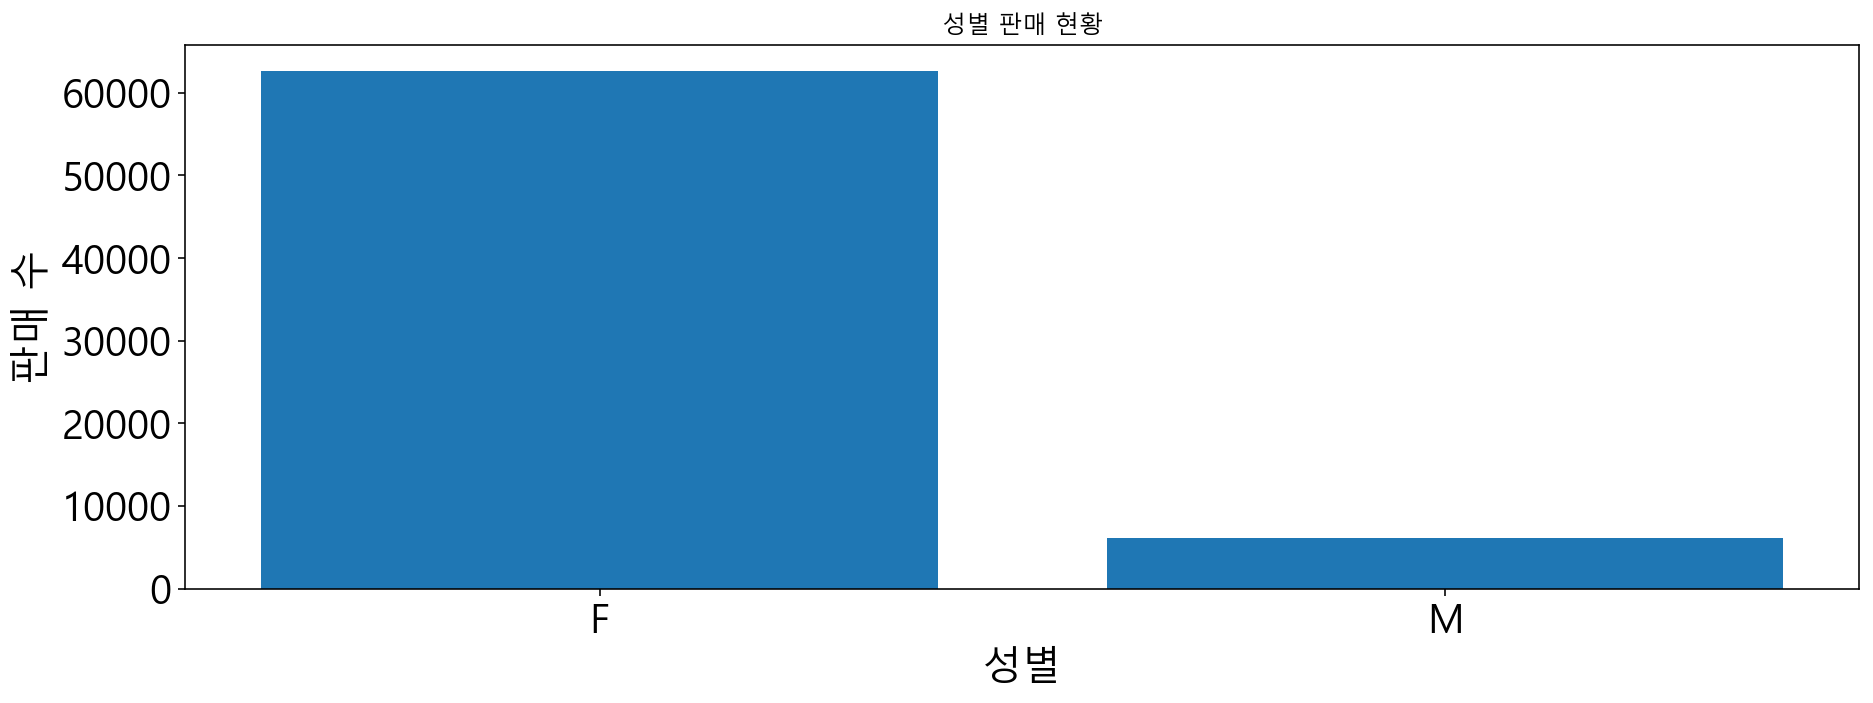

In [559]:
sales_g = sales.groupby(by='Gender', as_index=False)[['OrderID']].count()

plt.figure(figsize=(15,5))
plt.bar(sales_g['Gender'],sales_g['OrderID'])
plt.title('성별 판매 현황')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("성별",fontsize=20)
plt.ylabel("판매 수",fontsize=20)
plt.show()

In [560]:
# 성별 판매 현황 확인
print(sales.loc[sales['Gender']=='F','Gender'].count())
print(sales.loc[sales['Gender']=='M','Gender'].count())

62662
6177


**2) 지역별 판매 현황**

- 지역별 판매 현황을 막대 그래프로 시각화해 확인합니다.

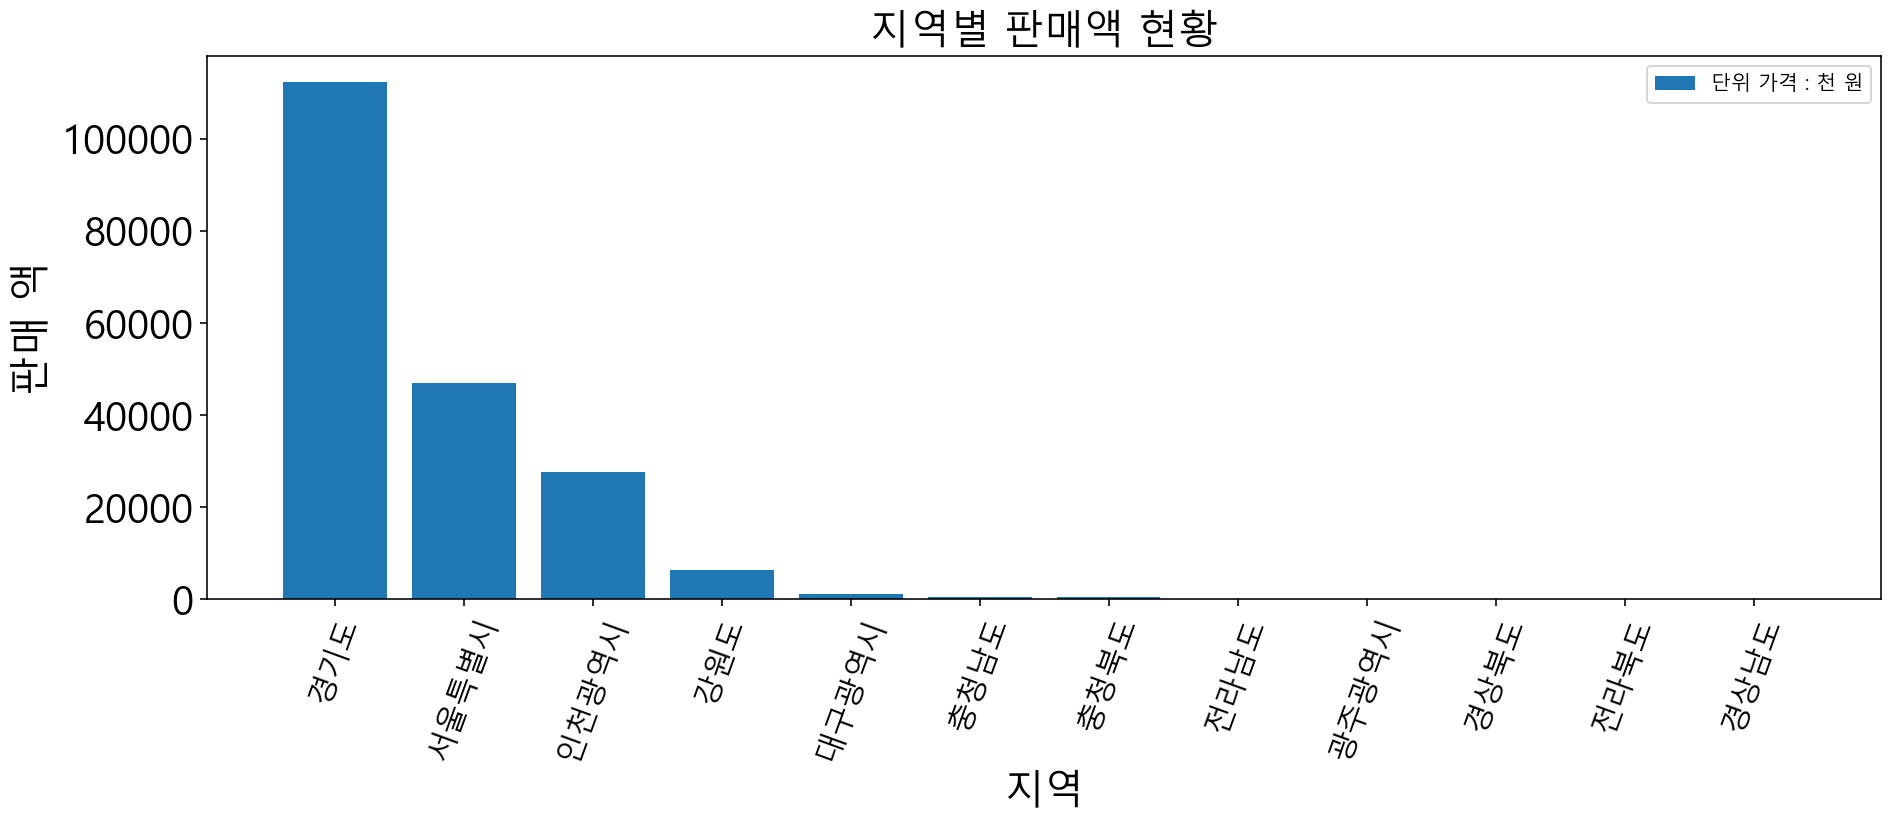

In [561]:
sales_a = sales.groupby(by='Addr1', as_index=False)[['Amt']].sum()
sales_a = sales_a.sort_values(by='Amt', ascending = False)

sales_a.head()
plt.figure(figsize=(15,5))
plt.bar(sales_a['Addr1'],sales_a['Amt']/1000)
plt.title('지역별 판매액 현황',fontsize=20)
plt.xticks(rotation=70,fontsize=15)
plt.yticks(fontsize=20)
plt.xlabel("지역",fontsize=20)
plt.ylabel("판매 액",fontsize=20)
plt.legend(['단위 가격 : 천 원'], fontsize=10)
plt.show()


**3) 경기 지역 판매 현황**  
- 구군 지역별 판매 현황
- 코드 내에서 '경기도' 만 수정하여 진행 가능  
ex. '경기도'->'강원도'

In [589]:
sales_a1 = sales.loc[sales['Addr1'].isin(['경기도'])]
sales_a1.head()

,ProductName,Category,CustomerID,RegisterDate,Gender,Addr1,Addr2,OrderID,Seq,Qty,Amt,OrderYear,OrderMonth,Age
0,마늘,채소,c017487,2002-07-31,F,경기도,성남시,48,1,1,3300,2016,3,49
1,마늘,채소,c017487,2002-07-31,F,경기도,성남시,26,1,1,3300,2016,4,49
2,마늘,채소,c017487,2002-07-31,F,경기도,성남시,1,1,1,3100,2016,9,49
3,마늘,채소,c017487,2002-07-31,F,경기도,성남시,21,1,1,3100,2016,12,49
4,마늘,채소,c017487,2002-07-31,F,경기도,성남시,56,3,1,3100,2016,12,49


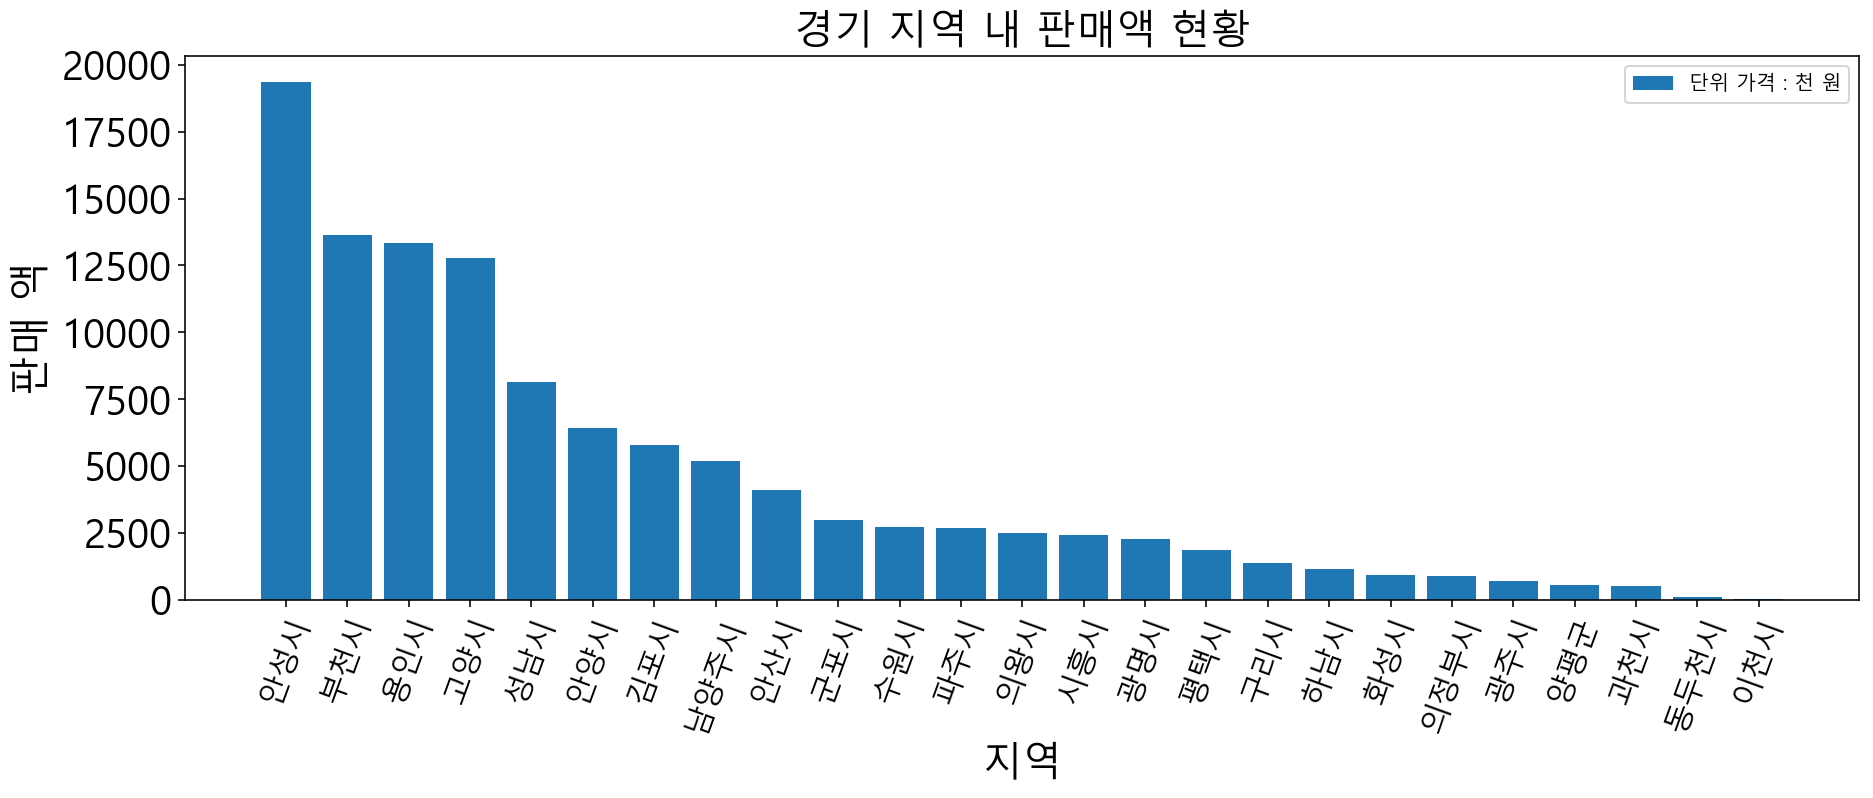

In [590]:
sales_a11 = sales_a1.groupby(by='Addr2', as_index=False)[['Amt']].sum()
sales_a11= sales_a11.sort_values(by='Amt', ascending = False)


plt.figure(figsize=(15,5))
plt.bar(sales_a11['Addr2'],sales_a11['Amt']/1000)
plt.title('경기 지역 내 판매액 현황',fontsize=20)
plt.xticks(rotation=70,fontsize=15)
plt.yticks(fontsize=20)
plt.xlabel("지역",fontsize=20)
plt.ylabel("판매 액",fontsize=20)
plt.legend(['단위 가격 : 천 원'], fontsize=10)
plt.show()




**4) 지역별 구매품목 현황**
- 구군 지역별 판매품목 현황
- 코드 내에서 '경기도' 만 수정하여 진행 가능  
ex. '경기도'->'강원도'

In [593]:
sales_b1 = sales.loc[sales['Addr1'].isin(['경기도'])]
sales_b1.head()

,ProductName,Category,CustomerID,RegisterDate,Gender,Addr1,Addr2,OrderID,Seq,Qty,Amt,OrderYear,OrderMonth,Age
0,마늘,채소,c017487,2002-07-31,F,경기도,성남시,48,1,1,3300,2016,3,49
1,마늘,채소,c017487,2002-07-31,F,경기도,성남시,26,1,1,3300,2016,4,49
2,마늘,채소,c017487,2002-07-31,F,경기도,성남시,1,1,1,3100,2016,9,49
3,마늘,채소,c017487,2002-07-31,F,경기도,성남시,21,1,1,3100,2016,12,49
4,마늘,채소,c017487,2002-07-31,F,경기도,성남시,56,3,1,3100,2016,12,49


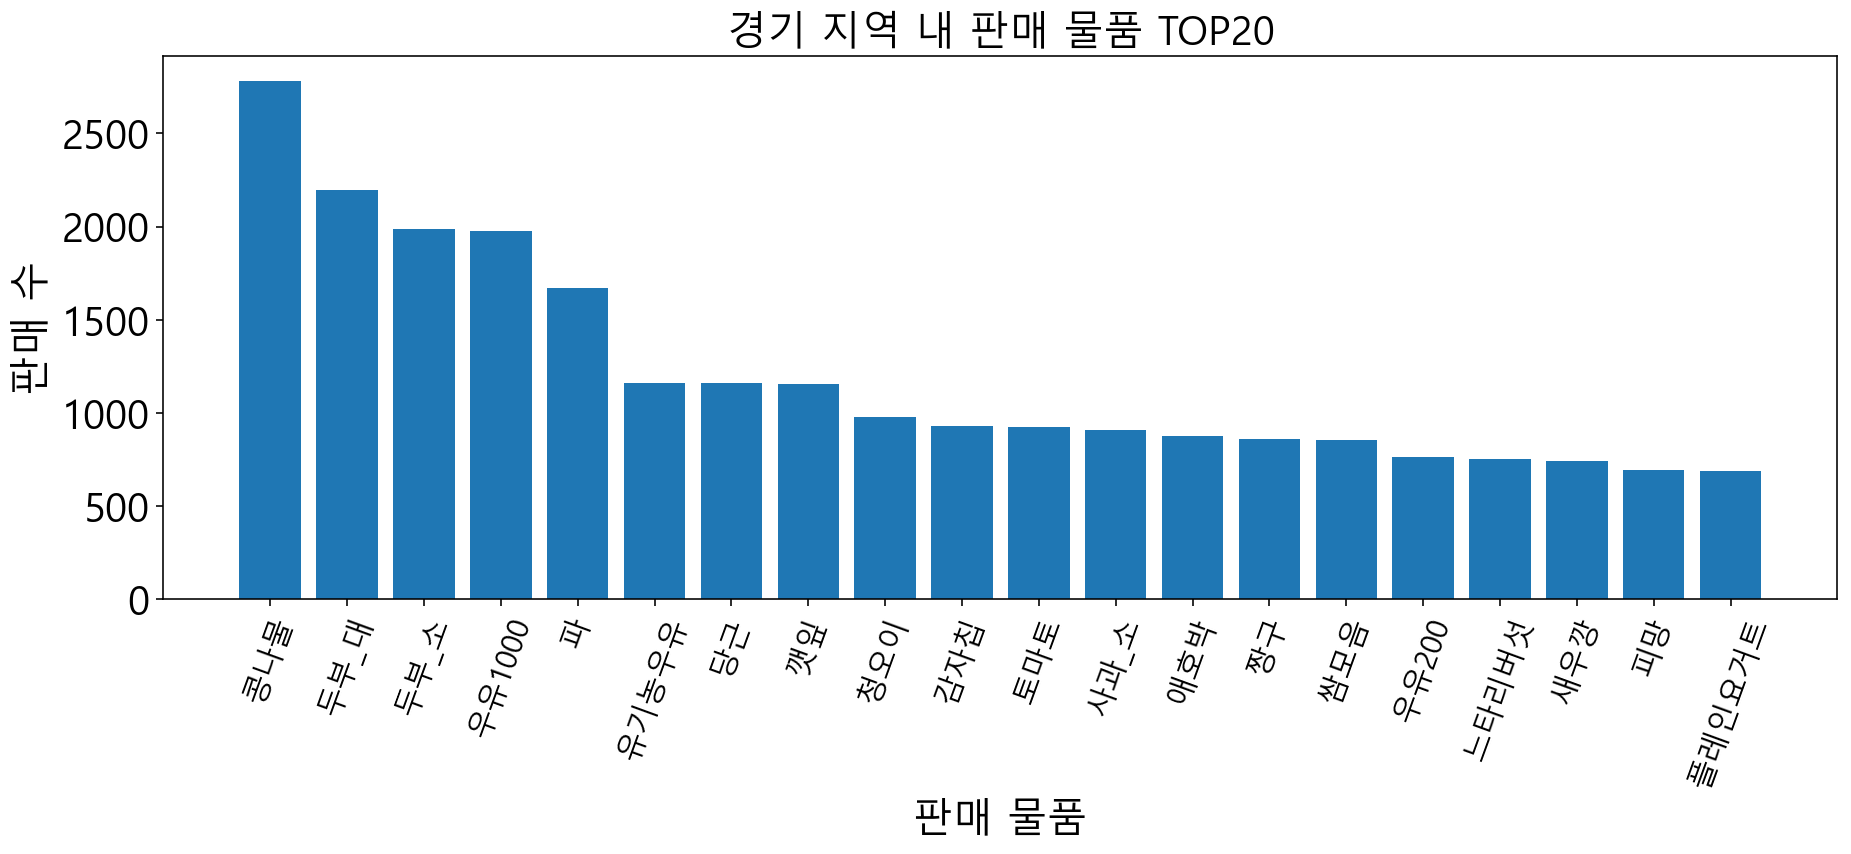

In [594]:
sales_b2 = sales_b1.groupby(by='ProductName', as_index=False)[['OrderID']].count()
sales_b2 = sales_b2.sort_values(by='OrderID', ascending = False).head(20)

plt.figure(figsize=(15,5))
plt.bar(sales_b2['ProductName'],sales_b2['OrderID'])
plt.title('경기 지역 내 판매 물품 TOP20',fontsize=20)
plt.xticks(rotation=70,fontsize=15)
plt.yticks(fontsize=20)
plt.xlabel("판매 물품",fontsize=20)
plt.ylabel("판매 수",fontsize=20)
plt.show()


**5) 월별 판매 현황**

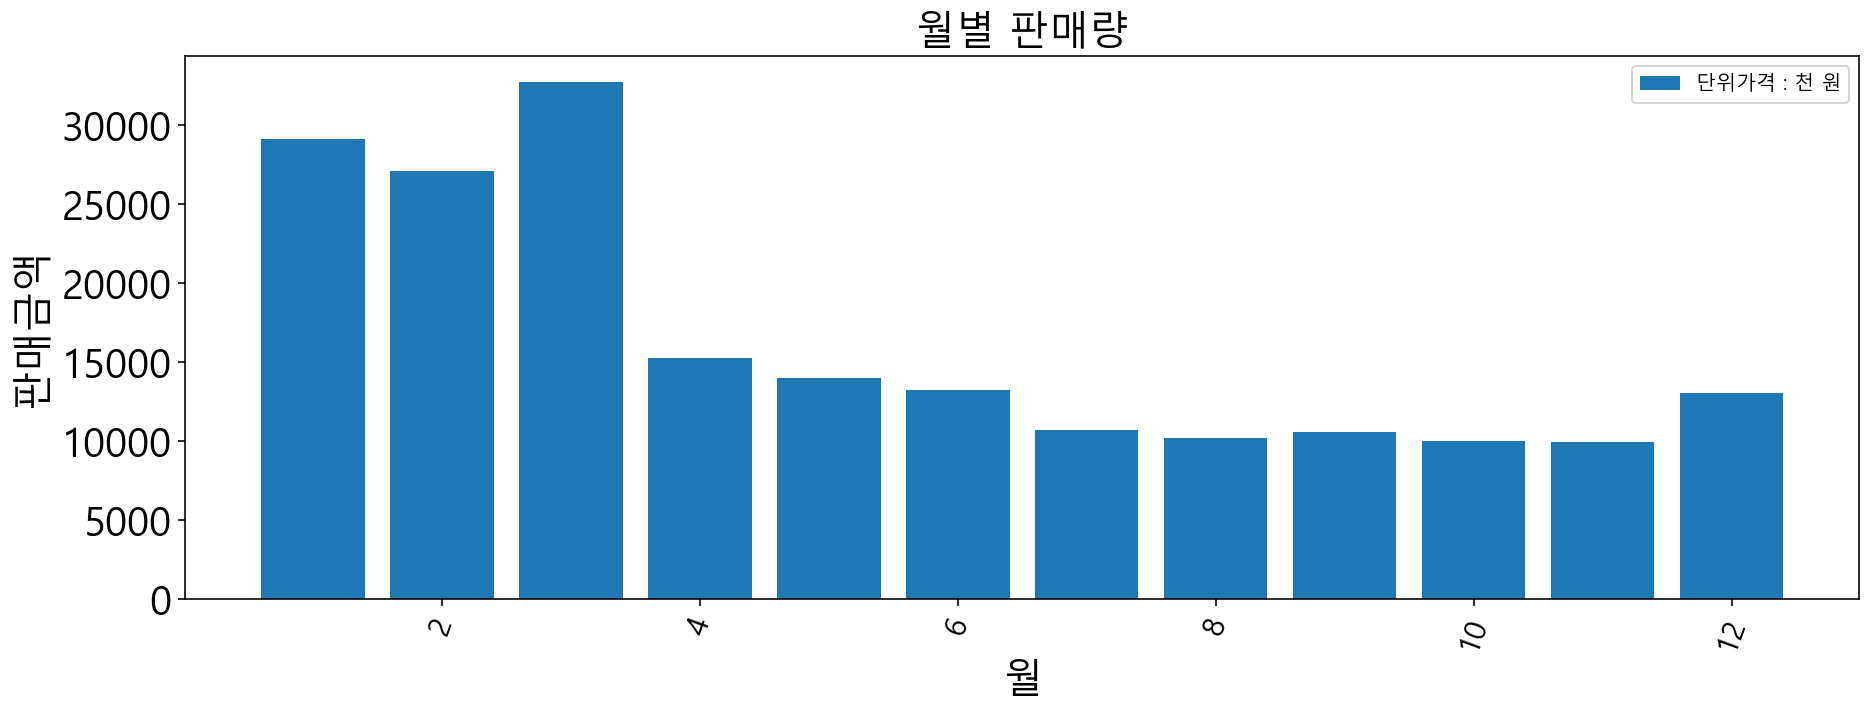

In [608]:
sales_c = sales.groupby(by='OrderMonth', as_index=False)[['Amt']].sum()


plt.figure(figsize=(15,5))
plt.bar(sales_c['OrderMonth'],sales_c['Amt']/1000)
plt.title('월별 판매량',fontsize=20)
plt.xticks(rotation=70,fontsize=15)
plt.yticks(fontsize=20)
plt.xlabel("월",fontsize=20)
plt.ylabel("판매금액",fontsize=20)
plt.legend(["단위가격 : 천 원"])
plt.show()

## 5.고객 분류

* 고객을 등급을 나눠 판매 현황을 분석하고 이에 따른 판매 전략을 수립하려합니다.
- 우선 고객을 일정 기준에 따라 분류하고 등급을 지정해야 합니다.
- 다음과 같은 순서로 처리하면 될 것입니다.
    - 고객별 주문 수량 합, 판매 금액 합을 갖는 데이터프레임 선언
    - 고객 분류 기준과 이 기준에 따른 등급 이름 정의
    - 고객 등급을 갖는 새로운 Level 열 추가

**1) 고객별 집계**

* 고객별 주문 수량 합, 판매 금액 합을 갖는 cst 데이터프레임을 선언합니다.

In [618]:
cst = sales.groupby('CustomerID',as_index=False).agg({'OrderID':'count','Amt':'sum'})


cst.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2237 entries, 0 to 2236
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CustomerID  2237 non-null   object
 1   OrderID     2237 non-null   int64 
 2   Amt         2237 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 69.9+ KB


**2) 고객 분류 기준 찾기**

- 고객 등급 분류 기준을 찾기 위해 관련 데이터를 확인합니다.

In [619]:
cst.head()

,CustomerID,OrderID,Amt
0,c017487,90,296447
1,c017503,37,160444
2,c017517,124,317590
3,c017522,61,219849
4,c017526,21,48881


**3) 고객 분류 기준 정리**

- 고객 등급 분류 기준과 그 기준에 따른 등급 이름을 정리합니다.
- 예를 들면 다음과 같은 기준과 등급 이름을 정의할 수 있을 것입니다.
    - ~ 30,000: Family
    - 30,000 ~ 100,000: Bronze
    - 100,000 ~ 300,000: Silver
    - 300,000 ~ : Gold
    - 600,000 ~ : Platinum
- 분류 기준과 등급 이름
    -  판매 금액별 5등급
    -  Family - Bronze - Silver - Gold - Platinum

**4) 고객 등급 반영**

- 각자 정의한 기준에 따라 고객 등급을 Level 열로 저장합니다.

In [620]:

#판매금액 기준으로 5개 범위로 나눔
cst['Grade'] = pd.cut(cst['Amt'],5,labels=list('edcba'))
cst['Grade'] = cst['Grade'].map({'e':'Family',
                                'd':'Bronze',
                                'c':'Silver',
                                'b':'Gold',
                                'a':'Platinum'})


- 등급별 고객 수를 확인해 등급이 적절히 나뉘었는지 검증합니다.
- 검증 결과가 적절하지 않다면 위 기준을 변경해 등급을 다시 나눕니다.

In [621]:
#확인
cst.head()

,CustomerID,OrderID,Amt,Grade
0,c017487,90,296447,Bronze
1,c017503,37,160444,Family
2,c017517,124,317590,Bronze
3,c017522,61,219849,Family
4,c017526,21,48881,Family


## 6.등급별 고객 분석
(4가지 이상)

- 고객 등급을 기준으로 다양한 분석을 진행합니다.
- 등급 별 분석은 판매 전략을 새롭게 수립하는 데 중요한 자료가 될 것입니다.
- 분석 과정에서 판매 전략에 대한 부분을 고민해 보시기 바랍니다.

**1) 등급별 판매 수량**

- 고객 등급별 판매 수량을 막대 그래프로 시각화해 확인합니다.

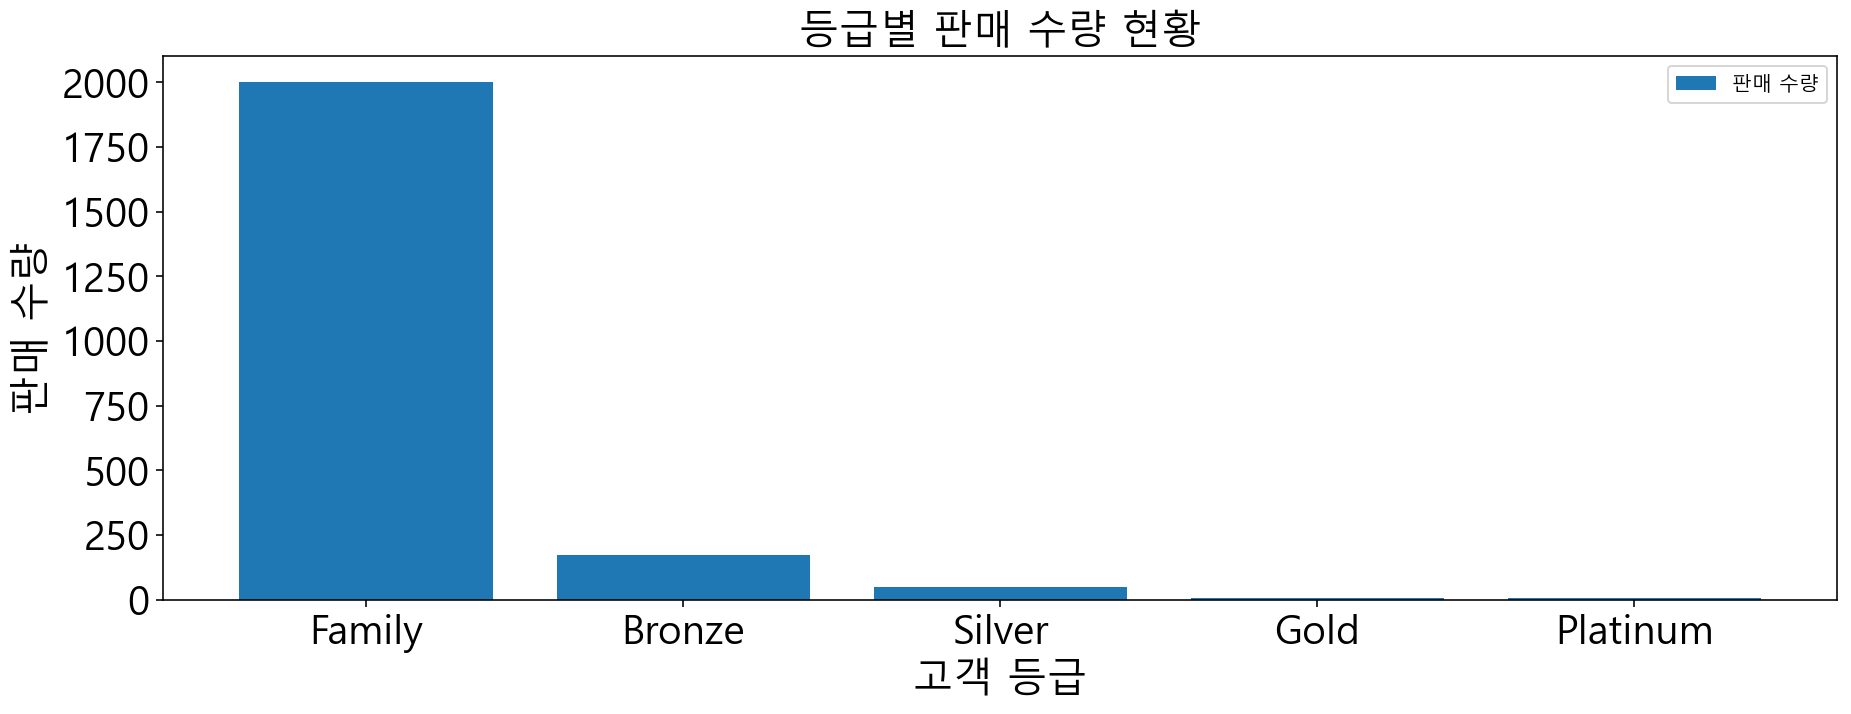

In [622]:
cst_o = cst.groupby(by='Grade', as_index=False)[['OrderID']].count()

plt.figure(figsize=(15, 5))
plt.bar(cst_o['Grade'], cst_o['OrderID'])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('등급별 판매 수량 현황',fontsize=20)
plt.legend(['판매 수량'], fontsize=10)
plt.xlabel("고객 등급",fontsize=20)
plt.ylabel("판매 수량",fontsize=20)
plt.show()


**2) 등급별 판매 금액**

- 고객 등급별 판매 금액을 막대 그래프로 시각화해 확인합니다. 

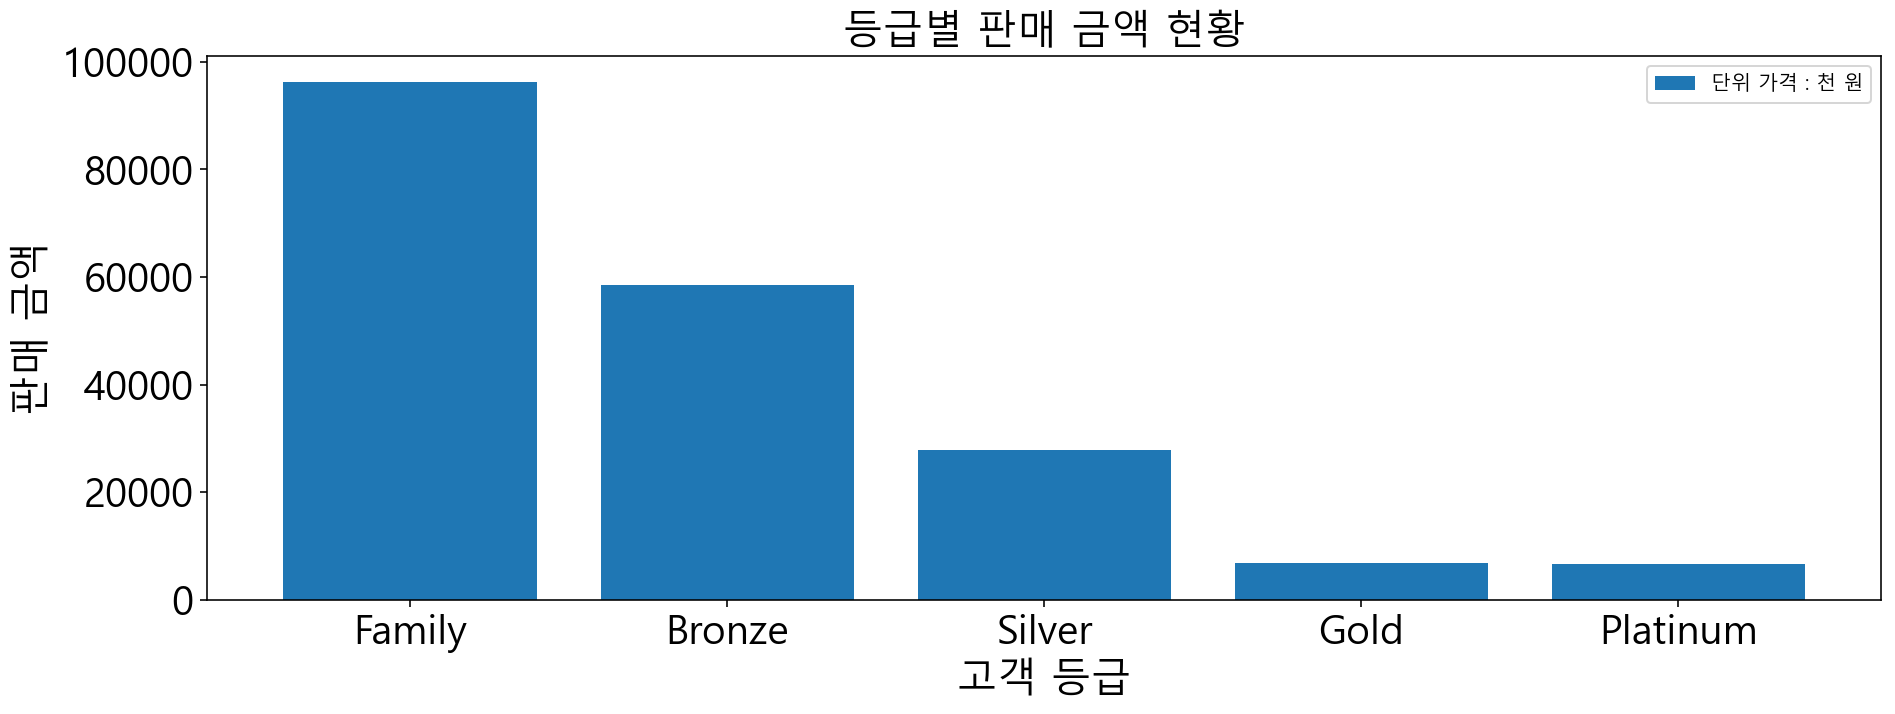

In [623]:
cst_o = cst.groupby(by='Grade', as_index=False)[['Amt']].sum()

plt.figure(figsize=(15, 5))
plt.bar(cst_o['Grade'], cst_o['Amt']/1000)
plt.title('등급별 판매 금액 현황',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(['단위 가격 : 천 원'], fontsize=10)
plt.xlabel("고객 등급",fontsize=20)
plt.ylabel("판매 금액",fontsize=20)
plt.show()




**3) 추가**

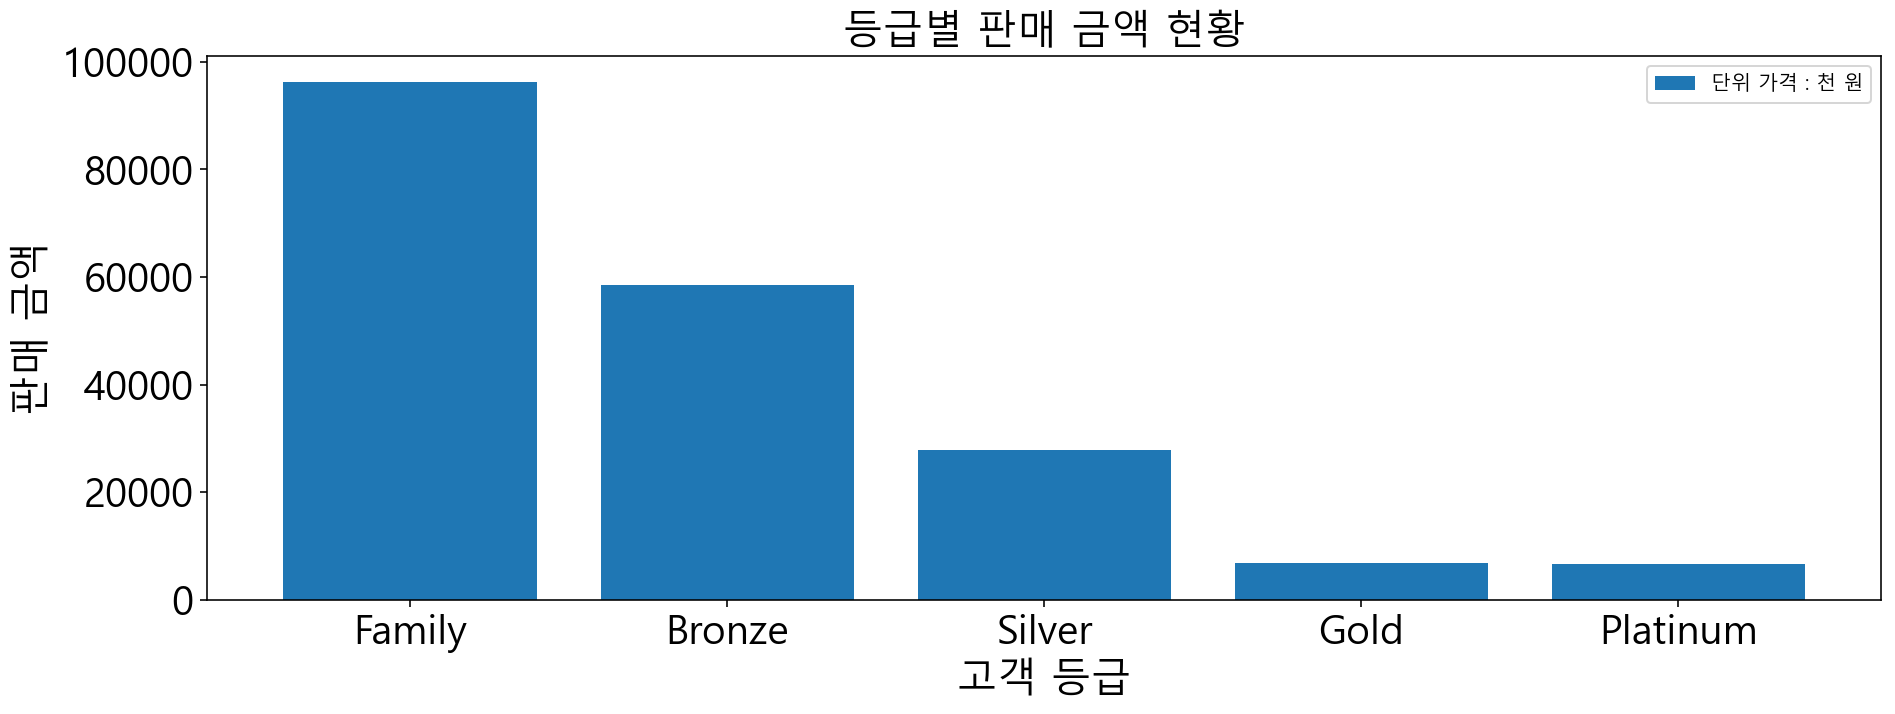

In [624]:
cst_o = cst.groupby(by='Grade', as_index=False)[['Amt']].sum()

plt.figure(figsize=(15, 5))
plt.bar(cst_o['Grade'], cst_o['Amt']/1000)
plt.title('등급별 판매 금액 현황',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(['단위 가격 : 천 원'], fontsize=10)
plt.xlabel("고객 등급",fontsize=20)
plt.ylabel("판매 금액",fontsize=20)
plt.show()

 
 

## 7.정리

- 분석을 통해 확인한 내용을 정리합니다.

**1) 의견**

판매 현황을 분석해서 얻게 되는것
회사의 판매전략에 제시할 수 있는 아이디어





- 지역 별 판매 순위를 참고하여 판매 실적이 저조한 지역에는 손님을 이끌 수 있는 이벤트를 판매 실적이 높은 지역에는 손님을 유지할 수 있는 방안을 모색
- 지역별 판매 품목을 참고하여 지역별 강세 품목과 약세 품목을 분석하여 매장 내 재고관리 용이
- 월별 판매수를 고려하여 손님들의 소비 패턴 분석